# Entanglement scaling in MERA systems

In [1]:
En=[-1.270005811417927, -1.2724314193572888, -1.2730375326245706, -1.273189042909428, -1.2732269193538452, -1.2732363883945284];
Ecorr = map( (x)-> (x+(4/pi)), En );
#coeff = map( (a,b) -> (b*(2^(2*a))), enumerate(Ecorr))

6-element Array{Float64,1}:
 0.00323373 
 0.000808125
 0.000202012
 5.05018e-5 
 1.26254e-5 
 3.15634e-6 

In [2]:
for (a,b) in enumerate(Ecorr)
    println(b*(2^(2*a)))
end
# Finding the coefficient of the 1/N^2 term and trying to correct for the 
# effect of the 1/N^3 term that complicates the measurement of the coefficient
# 24*pi or 8*pi*pi are both somewhat larger than 77.349
println("--------------------")
for (a,b) in enumerate(Ecorr)
    println( ((b*(2^(2*a)))*(77.349) - 1)*(2^a) )
end


0.01293493326894346
0.012930006045984044
0.012928775077895693
0.01292846738812159
0.01292839046914196
0.012928371238558611
--------------------
0.001008306839015649
0.000492150603279562
0.00022258800123253764
6.438406106923367e-5
-6.161927483461227e-5
-0.00021843639871832465


In [3]:
using JLD

In [4]:
include("BinaryMERA.jl")
include("OptimizeMERA.jl")

improveGraft! (generic function with 2 methods)

In [5]:
function entropy(rho3site)
    U,S,Vdag=tensorsvd(rho3site, [1,2,3], [4,5,6])
    EE = mapreduce( (x) -> -x*log(x) , +, S)
    return EE
end

entropy (generic function with 1 method)

In [18]:
macro fm(i,chi)
    @show :(fill(chi, $(i)))
end

function fnstring(i,chi)
    filenamestring = "solutionMERA_$(i)layers_"*string(([8;@fm(i,chi)]...))*"shape.jld"
    return filenamestring
end

function getEntList(i::Int,chi::Int)
    filenamestring = fnstring(i,chi) |> eval
    #println(filenamestring)
    z=load(filenamestring,"m_$(i)layers");
    rlist=buildReverseRhosList(z) |> reverse; 
    Slist=map(entropy,rlist)
    return Slist
end

$(Expr(:quote, :(fill(chi,$(Expr(:$, :i)))))) = :(fill(chi,i))


getEntList (generic function with 1 method)

# The plots

In [27]:
cd("/home/siva/towards_MERA/mera/fullrun9")

In [24]:
using PyPlot

INFO: Recompiling stale cache file /home/siva/.julia/lib/v0.4/Conda.ji for module Conda.
INFO: Recompiling stale cache file /home/siva/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/siva/.julia/lib/v0.4/PyPlot.ji for module PyPlot.


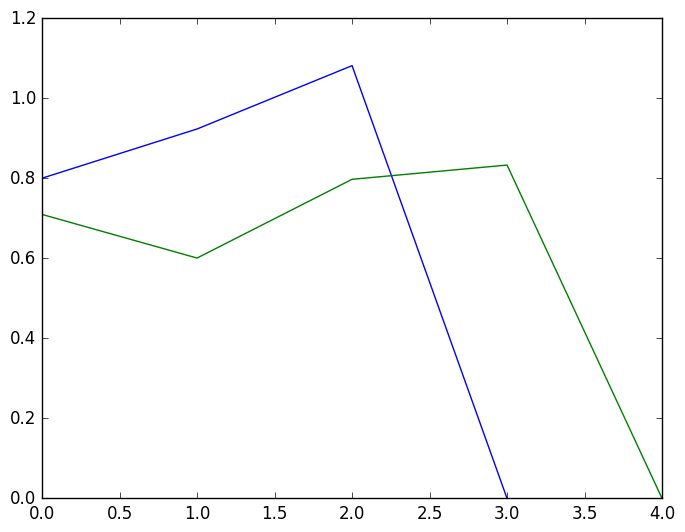

In [28]:
macro makeplt(i)
    return :(plot(collect(0:i), getEntList(i,5)))
end

for i in collect(3:4)
    @makeplt i
end

In [19]:
getEntList(3,5)

4-element Array{Any,1}:
 1.37786    
 1.85719    
 2.54098    
 4.61477e-13

In [25]:
@show const LAYER_SHAPE=(8,4,4,4,4,4,4,4,4,4,4)
@show const INIT_LAYERS=4
@show const INIT_LAYER_SHAPE=LAYER_SHAPE[1:INIT_LAYERS]


const LAYER_SHAPE = (8,4,4,4,4,4,4,4,4,4,4) = (8,4,4,4,4,4,4,4,4,4,4)
const INIT_LAYERS = 4 = 4
const INIT_LAYER_SHAPE = LAYER_SHAPE[1:INIT_LAYERS] = (8,4,4,4)


(8,4,4,4)